# Necessary Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras import datasets, layers, models, utils
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from keras.optimizers import Adam
from sklearn.preprocessing import scale
import tensorflow as tf
import keras

/usr/lib/python3/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/lib/python3/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/lib/python3/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/lib/python3/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is 

# Reading in Data

In [2]:
labels = pd.read_csv("/home/acw9163/umap_coords_Identities.txt",sep='\t')
labels

,UMAP_1,UMAP_2,identities
2hpf_AAACCCATCGTCGCTT.1,-11.158247,-9.704709,Maternal
2hpf_AAAGGTAGTTGCATTG.1,-10.596762,-6.775598,Maternal
2hpf_AAATGGACAATGTGGG.1,-10.280353,-9.252314,Maternal
2hpf_AACAAAGAGTGTAGTA.1,-10.188645,-9.705865,Maternal
2hpf_AACAAAGCATGGATCT.1,-8.900397,-9.172784,Maternal
2hpf_AACAAGAAGAGCCGAT.1,-10.080375,-10.398671,Maternal
2hpf_AACAAGAGTAAGGCCA.1,-11.090309,-9.639854,Maternal
2hpf_AACAGGGCAAATGGTA.1,-11.105155,-8.569799,Maternal
2hpf_AACAGGGTCGGCCTTT.1,-10.787582,-7.479116,Maternal
2hpf_AACCAACCAGGAGGTT.1,-8.988425,-9.329366,Maternal


In [3]:
lv_dump = pd.read_csv("/home/acw9163/Lv_seurat_dump.txt",sep='\t')
lv_dump.head()

,L-var-00021:Sp-PppL-150,L-var-00037:none,L-var-00103:Sp-Helz2L4,L-var-00113:Sp-Hypp-50,L-var-00115:Sp-Wwc1,L-var-00116:none,L-var-00118:Sp-Hypp-532,L-var-00119:none,L-var-00123:Sp-Ogt,L-var-00127:Sp-Dis3,...,L-var-06572:none,L-var-10052:Sp-Clect/Egf/hyalin,L-var-12309:Sp-ReelerL-7,L-var-12651:none,L-var-14112:Sp-Scnn1a-1,L-var-19606:Sp-FoxI,L-var-20952:Sp-Nato3,L-var-23942:Sp-Endrvt88,L-var-24763:Sp-Rvt/Exn/End/Pplp-1,cell
2hpf_AAACCCATCGTCGCTT.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2hpf_AAACCCATCGTCGCTT.1
2hpf_AAAGGTAGTTGCATTG.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2hpf_AAAGGTAGTTGCATTG.1
2hpf_AAATGGACAATGTGGG.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2hpf_AAATGGACAATGTGGG.1
2hpf_AACAAAGAGTGTAGTA.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2hpf_AACAAAGAGTGTAGTA.1
2hpf_AACAAAGCATGGATCT.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2hpf_AACAAAGCATGGATCT.1


In [4]:
lv_dump.shape,labels.shape

((50936, 21965), (50936, 3))

In [5]:
lv_dump_labeled = pd.merge(lv_dump,labels,left_index=True,right_index=True)

# Turning Categorical Classes into Numeric Classes

In [6]:
conditions = [(lv_dump_labeled['identities'] == 'CP'), 
              (lv_dump_labeled['identities'] == 'Ecto_AB'), 
              (lv_dump_labeled['identities'] == 'Ecto_APD'), 
              (lv_dump_labeled['identities'] == 'Ecto_Border'), 
              (lv_dump_labeled['identities'] == 'Ecto_CB'), 
              (lv_dump_labeled['identities'] == 'Ecto_OR'),
              (lv_dump_labeled['identities'] == 'Endo'),
              (lv_dump_labeled['identities'] == 'Endomeso'), 
              (lv_dump_labeled['identities'] == 'Maternal'), 
              (lv_dump_labeled['identities'] == 'Micromere'), 
              (lv_dump_labeled['identities'] == 'N'), 
              (lv_dump_labeled['identities'] == 'NSM'),
              (lv_dump_labeled['identities'] == 'NSM_Blasto'), 
              (lv_dump_labeled['identities'] == 'NSM_Pigment'), 
              (lv_dump_labeled['identities'] == 'PGC'), 
              (lv_dump_labeled['identities'] == 'PMC'), 
              (lv_dump_labeled['identities'] == 'Stomodeum')]
values = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

lv_dump_labeled['label'] = np.select(conditions, values)
lv_dump_labeled.head()

,L-var-00021:Sp-PppL-150,L-var-00037:none,L-var-00103:Sp-Helz2L4,L-var-00113:Sp-Hypp-50,L-var-00115:Sp-Wwc1,L-var-00116:none,L-var-00118:Sp-Hypp-532,L-var-00119:none,L-var-00123:Sp-Ogt,L-var-00127:Sp-Dis3,...,L-var-14112:Sp-Scnn1a-1,L-var-19606:Sp-FoxI,L-var-20952:Sp-Nato3,L-var-23942:Sp-Endrvt88,L-var-24763:Sp-Rvt/Exn/End/Pplp-1,cell,UMAP_1,UMAP_2,identities,label
2hpf_AAACCCATCGTCGCTT.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2hpf_AAACCCATCGTCGCTT.1,-11.158247,-9.704709,Maternal,8
2hpf_AAAGGTAGTTGCATTG.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2hpf_AAAGGTAGTTGCATTG.1,-10.596762,-6.775598,Maternal,8
2hpf_AAATGGACAATGTGGG.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2hpf_AAATGGACAATGTGGG.1,-10.280353,-9.252314,Maternal,8
2hpf_AACAAAGAGTGTAGTA.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2hpf_AACAAAGAGTGTAGTA.1,-10.188645,-9.705865,Maternal,8
2hpf_AACAAAGCATGGATCT.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2hpf_AACAAAGCATGGATCT.1,-8.900397,-9.172784,Maternal,8


# Capturing Time from Index Using Reg-Ex

In [7]:
lv_dump_labeled.reset_index(inplace=True)
lv_dump_labeled = lv_dump_labeled.rename(columns={'index':'name'})

In [8]:
lv_dump_labeled.head()

,name,L-var-00021:Sp-PppL-150,L-var-00037:none,L-var-00103:Sp-Helz2L4,L-var-00113:Sp-Hypp-50,L-var-00115:Sp-Wwc1,L-var-00116:none,L-var-00118:Sp-Hypp-532,L-var-00119:none,L-var-00123:Sp-Ogt,...,L-var-14112:Sp-Scnn1a-1,L-var-19606:Sp-FoxI,L-var-20952:Sp-Nato3,L-var-23942:Sp-Endrvt88,L-var-24763:Sp-Rvt/Exn/End/Pplp-1,cell,UMAP_1,UMAP_2,identities,label
0,2hpf_AAACCCATCGTCGCTT.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2hpf_AAACCCATCGTCGCTT.1,-11.158247,-9.704709,Maternal,8
1,2hpf_AAAGGTAGTTGCATTG.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2hpf_AAAGGTAGTTGCATTG.1,-10.596762,-6.775598,Maternal,8
2,2hpf_AAATGGACAATGTGGG.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2hpf_AAATGGACAATGTGGG.1,-10.280353,-9.252314,Maternal,8
3,2hpf_AACAAAGAGTGTAGTA.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2hpf_AACAAAGAGTGTAGTA.1,-10.188645,-9.705865,Maternal,8
4,2hpf_AACAAAGCATGGATCT.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2hpf_AACAAAGCATGGATCT.1,-8.900397,-9.172784,Maternal,8


In [9]:
lv_time = lv_dump_labeled
hour = pd.Series(lv_time['name'])
lv_time['Hour'] = hour.str.extract(r'^(.+?)h')
lv_time['Hour'] = lv_time['Hour'].astype(np.int)
lv_time.tail()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


,name,L-var-00021:Sp-PppL-150,L-var-00037:none,L-var-00103:Sp-Helz2L4,L-var-00113:Sp-Hypp-50,L-var-00115:Sp-Wwc1,L-var-00116:none,L-var-00118:Sp-Hypp-532,L-var-00119:none,L-var-00123:Sp-Ogt,...,L-var-19606:Sp-FoxI,L-var-20952:Sp-Nato3,L-var-23942:Sp-Endrvt88,L-var-24763:Sp-Rvt/Exn/End/Pplp-1,cell,UMAP_1,UMAP_2,identities,label,Hour
50931,24hpf_2_TTTGATCCACCAAATC.1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,24hpf_2_TTTGATCCACCAAATC.1,5.557675,-12.244672,PMC,15,24
50932,24hpf_2_TTTGGAGGTTATGGTC.1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.098612,...,0.0,0.0,0.0,0.0,24hpf_2_TTTGGAGGTTATGGTC.1,7.561848,5.621087,Ecto_AB,1,24
50933,24hpf_2_TTTGGTTCACCATATG.1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,24hpf_2_TTTGGTTCACCATATG.1,7.218944,1.653401,Endo,6,24
50934,24hpf_2_TTTGGTTCACTACACA.1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,24hpf_2_TTTGGTTCACTACACA.1,9.196153,-0.332714,Endo,6,24
50935,24hpf_2_TTTGGTTCACTCTGCT.1,0.0,0.0,0.0,0.0,1.098612,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,24hpf_2_TTTGGTTCACTCTGCT.1,5.586638,-12.263572,PMC,15,24


In [10]:
lv_time.set_index(['name'],inplace=True)

In [11]:
lv_time.head()

,L-var-00021:Sp-PppL-150,L-var-00037:none,L-var-00103:Sp-Helz2L4,L-var-00113:Sp-Hypp-50,L-var-00115:Sp-Wwc1,L-var-00116:none,L-var-00118:Sp-Hypp-532,L-var-00119:none,L-var-00123:Sp-Ogt,L-var-00127:Sp-Dis3,...,L-var-19606:Sp-FoxI,L-var-20952:Sp-Nato3,L-var-23942:Sp-Endrvt88,L-var-24763:Sp-Rvt/Exn/End/Pplp-1,cell,UMAP_1,UMAP_2,identities,label,Hour
name,,,,,,,,,,,,,,,,,,,,,
2hpf_AAACCCATCGTCGCTT.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2hpf_AAACCCATCGTCGCTT.1,-11.158247,-9.704709,Maternal,8,2
2hpf_AAAGGTAGTTGCATTG.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2hpf_AAAGGTAGTTGCATTG.1,-10.596762,-6.775598,Maternal,8,2
2hpf_AAATGGACAATGTGGG.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2hpf_AAATGGACAATGTGGG.1,-10.280353,-9.252314,Maternal,8,2
2hpf_AACAAAGAGTGTAGTA.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2hpf_AACAAAGAGTGTAGTA.1,-10.188645,-9.705865,Maternal,8,2
2hpf_AACAAAGCATGGATCT.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2hpf_AACAAAGCATGGATCT.1,-8.900397,-9.172784,Maternal,8,2


I found a 20% difference in accuracy between keeping the 'Hour' feature ordinal and one-hot encoding it.

In [12]:
cat_feats = ['Hour']
lv_time2 = pd.get_dummies(lv_time,columns=cat_feats,drop_first=True) 
lv_time2.head()

,L-var-00021:Sp-PppL-150,L-var-00037:none,L-var-00103:Sp-Helz2L4,L-var-00113:Sp-Hypp-50,L-var-00115:Sp-Wwc1,L-var-00116:none,L-var-00118:Sp-Hypp-532,L-var-00119:none,L-var-00123:Sp-Ogt,L-var-00127:Sp-Dis3,...,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_18,Hour_20,Hour_24
name,,,,,,,,,,,,,,,,,,,,,
2hpf_AAACCCATCGTCGCTT.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2hpf_AAAGGTAGTTGCATTG.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2hpf_AAATGGACAATGTGGG.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2hpf_AACAAAGAGTGTAGTA.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2hpf_AACAAAGCATGGATCT.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


The features from the 'labels' df have served their purpose, so they can now be dropped from the dataset.

In [13]:
lv = lv_time2.drop(columns=['cell','UMAP_1','UMAP_2','identities'])

Filling in any missing values with 0's as 0.0 represents the lack of the gene being expressed.

In [14]:
lv = lv.fillna(0.0)

# Setting up the data for training/testing

In [15]:
x = lv.drop('label',axis=1)
y = lv.label

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)
#using the random_state=101 here returns a good distribution of classes in both training and testing sets as seen below

In [17]:
label, count = np.unique(y_train,return_counts=True)
train_dist = pd.DataFrame({'Class':label,'Counts':count})

labels, counts = np.unique(y_test,return_counts=True)
test_dist = pd.DataFrame({'Class':labels,'Counts':counts})

print('Training Set Distribution \n',train_dist)
print('\n Testing Set Distribution \n',test_dist)

Training Set Distribution 
     Class  Counts
0       0     384
1       1    7251
2       2    2662
3       3     277
4       4    6925
5       5    6279
6       6    6036
7       7    1348
8       8    2246
9       9     152
10     10    1023
11     11    1638
12     12     754
13     13    1448
14     14     286
15     15    1972
16     16      67

 Testing Set Distribution 
     Class  Counts
0       0      90
1       1    1780
2       2     701
3       3      80
4       4    1750
5       5    1561
6       6    1562
7       7     343
8       8     567
9       9      48
10     10     251
11     11     388
12     12     189
13     13     324
14     14      60
15     15     477
16     16      17


# Turning X_train and X_test into a stacked matrix with each layer being a copy of the original

In [18]:
Xtr2 = X_train
Xtr3 = X_train
X_train_3d = np.dstack([X_train,Xtr2,Xtr3])

Xts2 = X_test
Xts3 = X_test
X_test_3d = np.dstack([X_test,Xts2,Xts3])

In [19]:
X_train_3d.shape

(40748, 21981, 3)

We now have 40748 samples with 21981 features in 3 layers. However, this will not work with a 2-D convolution. So the features must be reshaped to add another dimension.

In [20]:
X_train_3d = X_train_3d.reshape(40748,431,51,3)
X_train_3d.shape

(40748, 431, 51, 3)

In [21]:
X_test_3d.shape

(10188, 21981, 3)

In [22]:
X_test_3d = X_test_3d.reshape(10188,431,51,3)
X_test_3d.shape

(10188, 431, 51, 3)

The labels must be encoded to use categorical_crossentropy. 

In [23]:
#only do for categorical_crossentropy
y_tr_encoded = utils.to_categorical(y_train)
y_tst_encoded = utils.to_categorical(y_test)

In [24]:
K.clear_session()

# Modeling

This first model is a simple model used to test the efficacy of running a 2-D CNN.

In [25]:
%%time

model = models.Sequential([layers.Conv2D(32, (3,3), input_shape=(431,51,3), activation='relu',padding='same'),
                            layers.BatchNormalization(),
                            layers.Conv2D(32, (3,3), padding='same', activation='relu'),
                            layers.BatchNormalization(),
                            layers.Dropout(0.2),
                            layers.Flatten(),
                            layers.Dense(128, activation='relu'),
                            layers.Dropout(0.3),
                            layers.Dense(17, activation='softmax')
                            ])
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

with tf.device('/gpu:0'):
    history = model.fit(X_train_3d,y_tr_encoded,epochs=50,batch_size=1000,validation_data=(X_test_3d,y_tst_encoded))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 40748 samples, validate on 10188 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
40748/40748 [==============================] - 1158s 28ms/sample - loss: 10.5523 - acc: 0.3227 - val_loss: 12.8963 - val_acc: 0.1841
Epoch 2/50
40748/40748 [==============================] - 1158s 28ms/sample - loss: 7.0711 - acc: 0.5526 - val_loss: 11.1828 - val_acc: 0.2862
Epoch 3/50
40748/40748 [==============================] - 1157s 28ms/sample - loss: 5.1421 - acc: 0.6699 - val_loss: 11.1708 - val_acc: 0.2942
Epoch 4/50
40748/40748 [==============================] - 1158s 28ms/sample - loss: 4.7592 - acc: 0.6912 - val_loss: 12.9798 - val_acc: 0.1917
Epoch 5/50
40748/40748 [==============================] - 1157s 28ms/sample - loss: 3.6551 - acc: 0.6620 - val_loss: 13.1045 - val_acc: 0.1852

Model Summary
 - 49s - loss: 1.1299 - acc: 0.8360
[1.1299249881101112, 0.8359835]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 431, 51, 32)       896       
_________________________________________________________________
batch_normalization_v1 (Batc (None, 431, 51, 32)       128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 431, 51, 32)       9248      
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 431, 51, 32)       128       
_________________________________________________________________
dropout (Dropout)            (None, 431, 51, 32)       0         
_________________________________________________________________
flatten (Flatten)            (None, 703392)            0         
____________________________________________________________

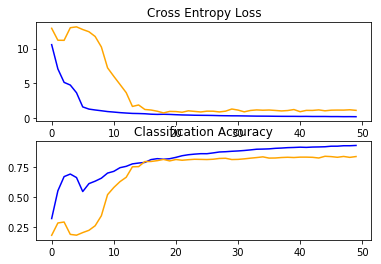

In [26]:
print('Model Summary')
print(model.evaluate(X_test_3d,y_tst_encoded,verbose=2))
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['acc'], color='blue', label='train')
plt.plot(history.history['val_acc'], color='orange', label='test')

model3.summary();

83.6% test accuracy is not bad. On this model, it seems the accuracy and loss levels out after 15 or so epochs. This is a good sign to move forward with a more advanced and complex model. Before moving on, however, we should save these results and predictions for visualizations.

In [54]:
pred = model.predict(X_test_3d).argmax(axis=1)
pred_df = pd.DataFrame(pred, columns=['predictions']).to_csv('Wilbanks_Imaged_Model_Predictions.csv')
pred_df_2 = pd.DataFrame(pred, columns=['predictions'])
pred_df_2.head()

,predictions
0,5
1,15
2,6
3,11
4,4


In order to properly visualize the data, the client needed the names of each cell with their labels and predictions. In y_test, we have the names of each cell. Using y_test with pred_df_2, we can merge them together to provide our client with the necessary data for visualization.

In [56]:
y_tst_df = pd.DataFrame(y_test)
y_tst_df.reset_index(inplace=True)
y_tst_df['predictions'] = pred_df_2['predictions']
y_tst_df

,name,label,predictions
0,6hpf_TTACTGTAGCCATTGT.1,5,5
1,11hpf_CATTGCCAGACGATAT.1,15,15
2,9hpf_ACCTACCAGACGGATC.1,6,6
3,11hpf_TCGACGGTCGAGCCTG.1,11,11
4,10hpf_CGTGATATCCCTCTTT.1,4,4
5,13hpf_CACGTGGAGAATAGTC.1,6,6
6,16hpf_TCTCACGTCCAACACA.1,12,12
7,4hpf_TGCCGAGTCACTGTCC.1,8,8
8,8hpf_CCTCTCCGTGTCATCA.1,2,2
9,9hpf_GCCATTCGTTGGGACA.1,6,6


In [58]:
y_tst_df.set_index('name')
y_tst_df.to_csv('Wilbanks_Imaged_Model_Predictions.csv',index=False)

Another great tool for evaluating the efficacy of the model is a confusion matrix. In previous attempts (using dense layers in our neural net and and MLP classifier), we noticed the models struggled in classifying cell types with sparse sampling - namely stomodeum and micromere cells. A confusion matrix helped us identify these errors as well as understand how and why the cells were being mis-classified. 

As you can see in the below confusion matrix, this model does particularly well at classifying small samples just as well if not better than larger samples. For clarity and better understanding, we will use percentages rather than counts.

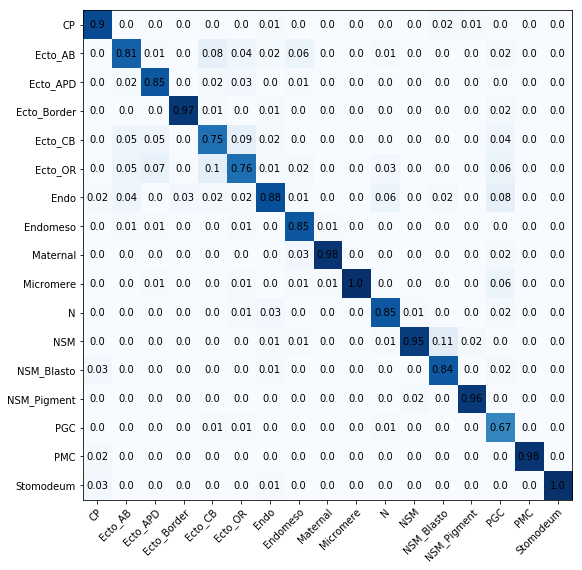

In [28]:
y_trans = [np.where(r==1)[0][0] for r in y_tst_encoded]

from sklearn.metrics import confusion_matrix
conf = pd.DataFrame(confusion_matrix(y_trans,pred))
conf_perc = conf/np.sum(conf)
conf_perc = conf_perc.round(decimals=2)

labels = ['CP','Ecto_AB','Ecto_APD','Ecto_Border','Ecto_CB',
         'Ecto_OR','Endo','Endomeso','Maternal','Micromere',
         'N','NSM','NSM_Blasto','NSM_Pigment','PGC','PMC','Stomodeum']
fig, ax = plt.subplots(figsize=(9,9))

im = ax.imshow(conf_perc, cmap='Blues', interpolation='nearest')


ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j,i,conf_perc.iloc[i,j],
                      ha='center',va='center',color='k')
plt.show()

plt.savefig('Wilbanks_Imaged_Model_CM_Heatmap.jpeg')

Lastly, we should save the model coefficients for the client to apply to a new dataset if desired.

In [37]:
model.save('wilbanks_imaged_gene_model.h5') 

# Expanding and tuning model

In [ ]:
initializer = tf.keras.initializers.VarianceScaling(scale=0.1, mode='fan_in', distribution='uniform')

model2 = models.Sequential([layers.Conv2D(32, (3,3), input_shape=(431,51,3), kernel_initializer=initializer, activation='relu',padding='same'),
                            layers.BatchNormalization(),
                            layers.Conv2D(32, (3,3), padding='same', kernel_initializer=initializer, activation='relu'),
                            layers.BatchNormalization(),
                            layers.MaxPool2D((2,2)),
                            layers.Dropout(0.2),
                            layers.Conv2D(64, (3,3), kernel_initializer=initializer, padding='same', activation='relu'),
                            layers.BatchNormalization(),
                            layers.Conv2D(64, (3,3), kernel_initializer=initializer, padding='same', activation='relu'),
                            layers.BatchNormalization(),
                            layers.MaxPool2D((2,2)),
                            layers.Dropout(0.3),
                            layers.Conv2D(128, (3,3), kernel_initializer=initializer, padding='same', activation='relu'),
                            layers.BatchNormalization(),
                            layers.Conv2D(128, (3,3), kernel_initializer=initializer, padding='same', activation='relu'),
                            layers.BatchNormalization(),
                            layers.MaxPool2D((2,2)),
                            layers.Dropout(0.4),
                            layers.Flatten(),
                            layers.Dense(128, activation='relu'),
                            layers.Dropout(0.5),
                            layers.Dense(17, activation='softmax')
                            ])
model2.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

with tf.device('/gpu:0'):
    history2 = model2.fit(X_train_3d,y_tr_encoded,epochs=50,batch_size=1000,validation_data=(X_test_3d,y_tst_encoded))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 40748 samples, validate on 10188 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
40748/40748 [==============================] - 2074s 51ms/sample - loss: 3.7111 - acc: 0.1660 - val_loss: 8.7952 - val_acc: 0.1532
Epoch 2/50
40748/40748 [==============================] - 2075s 51ms/sample - loss: 2.6441 - acc: 0.2325 - val_loss: 8.7000 - val_acc: 0.1529
Epoch 3/50
40748/40748 [==============================] - 2078s 51ms/sample - loss: 2.5530 - acc: 0.2505 - val_loss: 8.6959 - val_acc: 0.1747
Epoch 4/50
40748/40748 [==============================] - 2077s 51ms/sample - loss: 2.4813 - acc: 0.2535 - val_loss: 8.7045 - val_acc: 0.1747
Epoch 5/50
40748/40748 [==============================] - 2081s 51ms/sample - loss: 2.4350 - acc: 0.2651 - val_loss: 8.6696 - val_acc: 0.1747
Epoch

In [ ]:
print('Model 2 Summary')
print(model2.evaluate(X_test_3d,y_tst_encoded,verbose=2))
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history2['loss'], color='blue', label='train')
plt.plot(history.history2['val_loss'], color='orange', label='test')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history2['acc'], color='blue', label='train')
plt.plot(history.history2['val_acc'], color='orange', label='test')

model2.summary();

In [ ]:
pred = model2.predict(X_test_3d).argmax(axis=1)
pred_df = pd.DataFrame(pred, columns=['predictions']).to_csv('Wilbanks_Imaged_Model2_Predictions.csv')
pred_df_2 = pd.DataFrame(pred, columns=['predictions'])
pred_df_2.head()

In [ ]:
y_tst_df = pd.DataFrame(y_test)
y_tst_df.reset_index(inplace=True)
y_tst_df['predictions'] = pred_df_2['predictions']
y_tst_df

In [ ]:
y_tst_df.set_index('name')
y_tst_df.to_csv('Wilbanks_Imaged_Model2_Predictions.csv',index=False)

In [ ]:
y_trans = [np.where(r==1)[0][0] for r in y_tst_encoded]

from sklearn.metrics import confusion_matrix
conf = pd.DataFrame(confusion_matrix(y_trans,pred))
conf_perc = conf/np.sum(conf)
conf_perc = conf_perc.round(decimals=2)

labels = ['CP','Ecto_AB','Ecto_APD','Ecto_Border','Ecto_CB',
         'Ecto_OR','Endo','Endomeso','Maternal','Micromere',
         'N','NSM','NSM_Blasto','NSM_Pigment','PGC','PMC','Stomodeum']
fig, ax = plt.subplots(figsize=(9,9))

im = ax.imshow(conf_perc, cmap='Blues', interpolation='nearest')


ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j,i,conf_perc.iloc[i,j],
                      ha='center',va='center',color='k')
plt.show()

plt.savefig('Wilbanks_Imaged_Model2_CM_Heatmap.jpeg')